In [41]:
import pandas as pd
import numpy as anp
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [42]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
X, y = df.drop(labels='median_house_value', axis=1), df['median_house_value']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [45]:
min(df['total_bedrooms'])

1.0

In [46]:
X = X.fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [48]:
class LabelEncoder():
    def __init__(self, series:pd.Series):
        self.series = series
        self.label = {}

    def fit(self):
        self.label = {}
        change = 0

        for i in self.series:
            if(i not in self.label.keys()):
                self.label[i] = change
                change+=1

    def transforms(self):
        tmp = self.series.copy()
        for i, j in enumerate(self.series):
            tmp[i] = self.label[j]
        return tmp

In [50]:
encoder = LabelEncoder(X['ocean_proximity'])
encoder.fit()
X['ocean_proximity'] = encoder.transforms().astype('float64')

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576, -1.71472665],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796, -1.71472665],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 , -1.71472665],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331,  0.62663072],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292,  0.62663072],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947,  0.62663072]])

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [54]:
X_pca

array([[-2.12161627,  1.76578647],
       [ 2.90641102,  2.29772754],
       [-1.99987349,  1.84985111],
       ...,
       [-0.43120358,  1.58513546],
       [-0.84282735,  1.57410014],
       [ 0.15621492,  1.63343721]])

In [55]:
X_df = pd.DataFrame(X_pca,columns=['feature1','feature2'])
X_df.head()

,feature1,feature2
0,-2.121616,1.765786
1,2.906411,2.297728
2,-1.999873,1.849851
3,-1.949403,1.870331
4,-1.807118,1.905899


<Axes: xlabel='feature1', ylabel='feature2'>

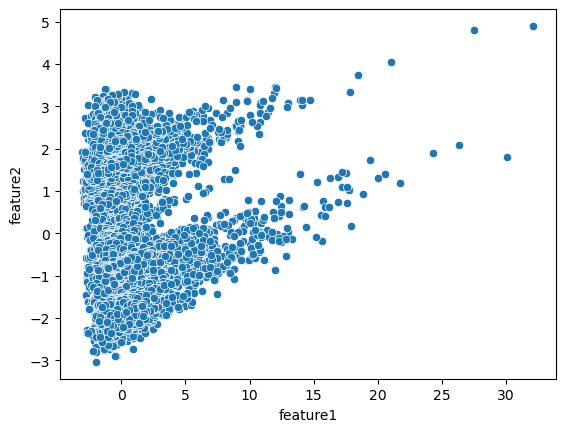

In [56]:
sns.scatterplot(X_df, x='feature1',y='feature2')

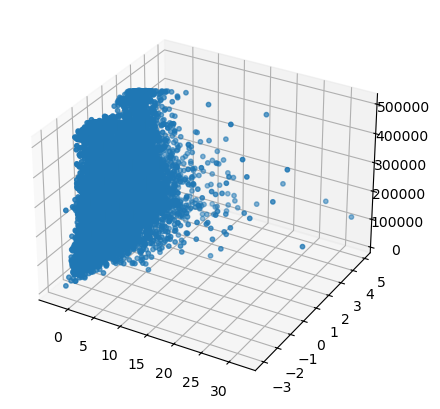

In [57]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_df['feature1'],X_df['feature2'],y, s=10)

plt.show()

<Axes: xlabel='feature1', ylabel='median_house_value'>

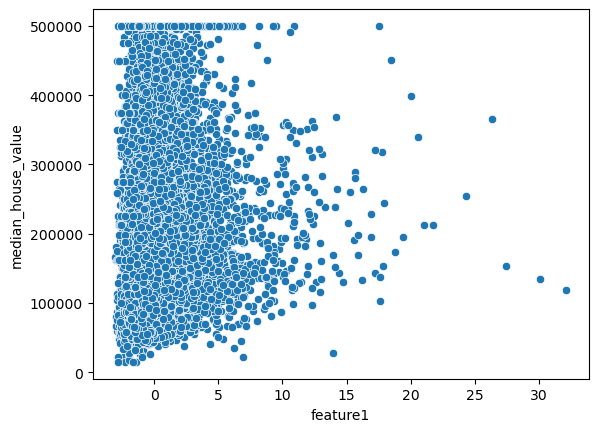

In [58]:
sns.scatterplot(x=X_df['feature1'],y=y)

<Axes: xlabel='feature2', ylabel='median_house_value'>

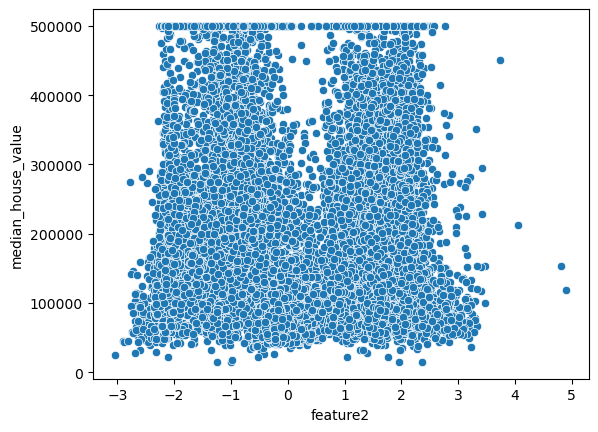

In [59]:
sns.scatterplot(x=X_df['feature2'],y=y)

<Axes: xlabel='median_house_value', ylabel='Count'>

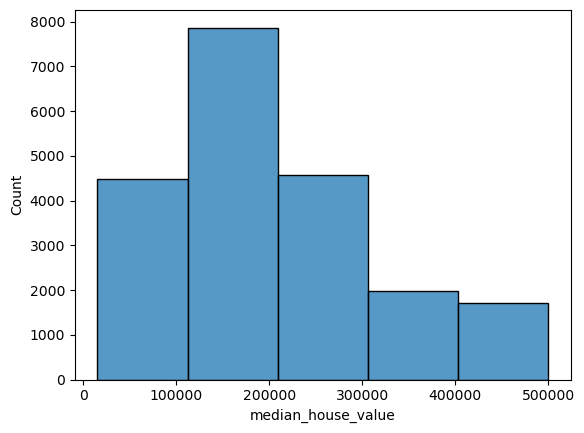

In [60]:
sns.histplot(y, bins=5)

In [65]:
categrical_target = np.digitize(y, bins = [-np.inf, 100000, 200000, 300000,400000, np.inf])

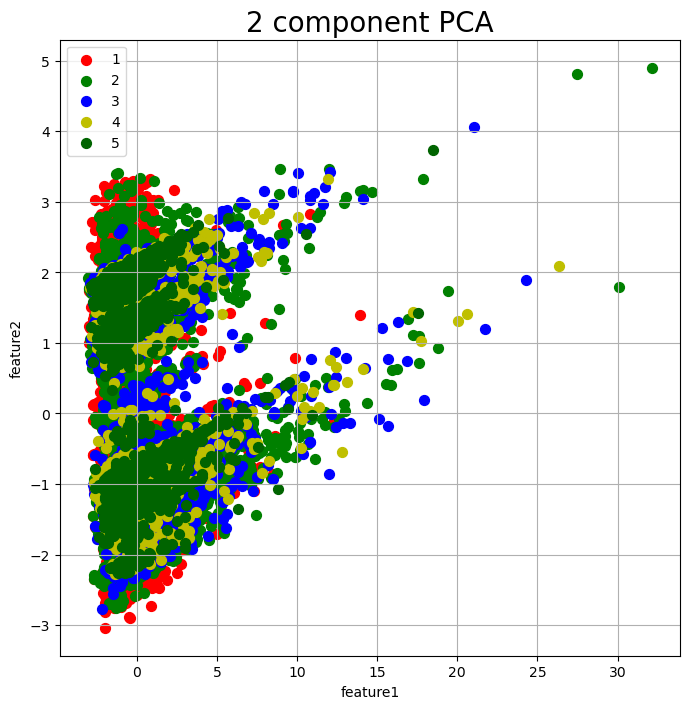

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_title('2 component PCA', fontsize=20)
targets = [1,2,3,4,5]
colors = ['r','g','b','y','darkgreen']
for target, color in zip(targets,colors):
    idx = categrical_target == target
    ax.scatter(X_df.loc[idx,'feature1'], X_df.loc[idx,'feature2'],c=color,s=50)
ax.legend(targets)
ax.grid()

In [87]:
result = []
for i in range(1,len(X.columns)):
    pca = PCA(n_components=i)
    X_pca = pca.fit(X_scaled)
    result.append(pca.explained_variance_ratio_)

In [88]:
result

[array([0.43227689]),
 array([0.43227689, 0.21571067]),
 array([0.43227689, 0.21571067, 0.12849346]),
 array([0.43227689, 0.21571067, 0.12849346, 0.11779363]),
 array([0.43227689, 0.21571067, 0.12849346, 0.11779363, 0.07193313]),
 array([0.43227689, 0.21571067, 0.12849346, 0.11779363, 0.07193313,
        0.01684726]),
 array([0.43227689, 0.21571067, 0.12849346, 0.11779363, 0.07193313,
        0.01684726, 0.00869974]),
 array([0.43227689, 0.21571067, 0.12849346, 0.11779363, 0.07193313,
        0.01684726, 0.00869974, 0.0053102 ])]

In [89]:
result_sum = []
for i in result:
    result_sum.append(1-sum(i))

In [90]:
result_sum

[0.5677231051685814,
 0.35201243656954395,
 0.2235189731456777,
 0.10572534663780764,
 0.03379221243315411,
 0.016944951464945124,
 0.008245211301703748,
 0.002935015570931787]

<Axes: >

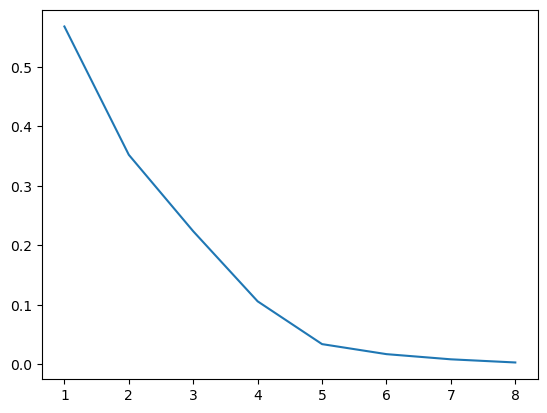

In [92]:
sns.lineplot(x=range(1,len(X.columns)),y=result_sum)